<a href="https://colab.research.google.com/github/codholic/multiclass_-classification_Chinese_zodiac_animals/blob/master/Chinese_Zodiac_Animal_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [15]:
!unzip signs.zip

Archive:  signs.zip
replace signs/valid/pig/00000563.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: signs/valid/pig/00000563.jpg  
  inflating: signs/valid/pig/00000205.jpg  
  inflating: signs/valid/pig/00000211.jpg  
  inflating: signs/valid/pig/00000577.jpg  
  inflating: signs/valid/pig/00000588.jpg  
  inflating: signs/valid/pig/00000742.jpeg  
  inflating: signs/valid/pig/00000589.jpg  
  inflating: signs/valid/pig/00000210.jpg  
  inflating: signs/valid/pig/00000576.jpg  
  inflating: signs/valid/pig/00000562.jpg  
  inflating: signs/valid/pig/00000238.jpg  
  inflating: signs/valid/pig/00000200.jpeg  
  inflating: signs/valid/pig/00000650.jpeg  
  inflating: signs/valid/pig/00000012.jpg  
  inflating: signs/valid/pig/00000760.jpg  
  inflating: signs/valid/pig/00000199.jpg  
  inflating: signs/valid/pig/00000600.jpg  
  inflating: signs/valid/pig/00000166.jpg  
  inflating: signs/valid/pig/00000172.jpg  
  inflating: signs/valid/pig/00000614.jpg  
  inflating: signs/

In [0]:
import os
os.chdir("/content/drive/My Drive/")

In [0]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models
from torch.utils.data.sampler import SubsetRandomSampler
import numpy as np
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [0]:
data_dir = 'signs'

batch_size = 20


#Define transforms for the training data and testing data
train_transforms = transforms.Compose([transforms.Resize(255),
                                       transforms.CenterCrop(224),
                                       transforms.RandomHorizontalFlip(p=0.5),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.5, 0.5, 0.5],
                                                           [0.5, 0.5, 0.5])])

val_transforms = transforms.Compose([transforms.Resize(255),
                                       transforms.CenterCrop(224),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.5, 0.5, 0.5],
                                                           [0.5, 0.5, 0.5])])

test_transforms = transforms.Compose([transforms.Resize(255),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.5, 0.5, 0.5],
                                                           [0.5, 0.5, 0.5])])

#  Preparing datasets
train_data = datasets.ImageFolder(data_dir + '/train', transform=train_transforms)
test_data = datasets.ImageFolder(data_dir + '/test', transform=test_transforms)
val_data = datasets.ImageFolder(data_dir + '/valid', transform=val_transforms)

 


#specifying image classes
Class=[' Rat', 'Ox', 'Tiger', 'Rabbit', 'Dragon', 'Snake', 'Horse', 'Goat', 'Monkey', 'Rooster', 'Dog', 'Pig']

In [19]:
!pip install nonechucks
import nonechucks as nc
train_data_set = nc.SafeDataset(train_data)
test_data_set = nc.SafeDataset(test_data)
val_data_set = nc.SafeDataset(val_data)

In [20]:
#Dataloader 
trainloader = torch.utils.data.DataLoader(train_data_set, batch_size=batch_size,shuffle=True)
valloader = torch.utils.data.DataLoader(val_data_set, batch_size=batch_size,shuffle=True)
testloader = torch.utils.data.DataLoader(test_data_set, batch_size=batch_size)

print("trainset_length:", len(train_data_set), ", validationset_length:", len(val_data_set), ", testset_length:", len(test_data_set))

trainset_length: 7197 , validationset_length: 650 , testset_length: 660


20


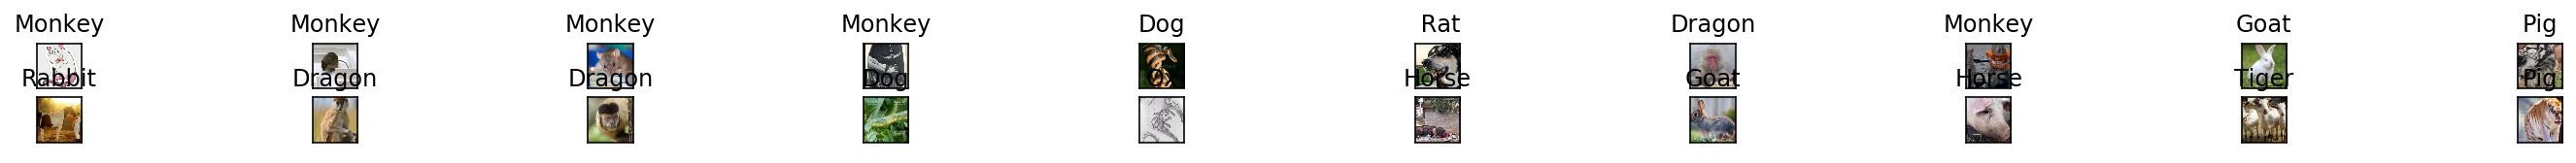

In [22]:
# not written by me
 
# helper function to un-normalize and display an image
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    plt.imshow(np.transpose(img, (1, 2, 0)))  # convert from Tensor image

# obtain one batch of training images
dataiter = iter(trainloader)
images, labels = dataiter.next()
images = images.numpy() # convert images to numpy for display
print(len(images))

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
# display 20 images
for idx in np.arange(20):
    ax = fig.add_subplot(8, 20/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx])
    ax.set_title(Class[labels[idx]])

In [23]:
#network = models.resnext101_32x8d(pretrained=True)
network = models.resnet152(pretrained=True)
print(network)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [0]:
# to avoid recalculations again
for param in network.parameters():
  param.requires_grad=False

In [25]:
# write a new classifier, to get tweleve outputs only
from collections import OrderedDict
import torch.nn as nn
import torch.nn.functional as f

od = OrderedDict() 
od['in'] = nn.Linear(2048, 256)
od['a1'] = nn.ReLU()
od['d1'] = nn.Dropout(0.35)
od['l1'] = nn.Linear(256, 64)
od['a2'] = nn.ReLU()
od['d2'] = nn.Dropout(0.35)
od['l2'] = nn.Linear(64, 12)
od['softmax'] = nn.LogSoftmax(dim=1)

new_classifier = nn.Sequential(od)
for param in new_classifier.parameters():
  param.requires_grad=True

# set the new classifier
network.fc = new_classifier
print(network)

 

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [26]:
train_on_gpu=torch.cuda.is_available
if (train_on_gpu):
  print("training on GPU")
  network.cuda()




training on GPU


In [0]:
import torch.optim as optim
criterion = nn.NLLLoss()
optimizer = optim.Adam(network.parameters(), lr=0.01)

In [56]:
epoch = 20
min_validation_loss = float('inf')
train_losses, validation_losses = [], []
for i in range(epoch):
    train_loss = 0
    itr_counter = 0
    for images, labels in iter(trainloader):
        images, labels = images.to('cuda'), labels.to('cuda')
        optimizer.zero_grad()
        logits = network(images)
        loss = criterion(logits, labels)    
        train_loss += loss.item() 
        loss.backward()
        optimizer.step()
        itr_counter += 1
    else:
        avg_train_loss = train_loss / itr_counter
        train_losses.append(avg_train_loss)
        
        itr_counter = 0
        accuracy = 0
        val_loss = 0
        with torch.no_grad():
          network.eval()
          for images, labels in iter(valloader):
            images, labels = images.to('cuda'), labels.to('cuda')
            logits = network(images)
            loss = criterion(logits, labels)    
            validation_loss += loss.item()
            ps = torch.exp(logits)
            probablities, classes = ps.topk(1)
            equals = (classes == labels.reshape(*classes.shape))
            accuracy += torch.mean(equals.type(torch.FloatTensor))
            itr_counter += 1
          else:
            avg_val_loss = val_loss / itr_counter
            validation_losses.append(avg_val_loss)
            accuracy = accuracy / itr_counter
            print("epoch #",i, ", train_loss: ", avg_train_loss, ", validation_loss: ", avg_val_loss,  ", Accuracy: ", accuracy.item()*100,"%")
            if avg_val_loss < min_validation_loss:
              print("min_validation_loss update:", min_validation_loss, "-->", avg_val_loss)
              min_validation_loss = avg_val_loss
              torch.save(network.state_dict(), 'Chinese_Zodiac_signs_classification_model.pth')
            network.train()

epoch # 0 , train_loss:  1.9983311238802142 , validation_loss:  0.0 , Accuracy:  67.87879467010498 %
min_validation_loss update: inf --> 0.0
epoch # 1 , train_loss:  1.447803063856231 , validation_loss:  0.0 , Accuracy:  76.96969509124756 %
epoch # 2 , train_loss:  1.3071669815315141 , validation_loss:  0.0 , Accuracy:  68.63638162612915 %
epoch # 3 , train_loss:  1.3391575480500857 , validation_loss:  0.0 , Accuracy:  73.93938899040222 %
epoch # 4 , train_loss:  1.2704497542646196 , validation_loss:  0.0 , Accuracy:  76.666659116745 %
epoch # 5 , train_loss:  1.2857726242807177 , validation_loss:  0.0 , Accuracy:  71.06059789657593 %
epoch # 6 , train_loss:  1.2604961059987545 , validation_loss:  0.0 , Accuracy:  80.60605525970459 %
epoch # 7 , train_loss:  1.2466949338714282 , validation_loss:  0.0 , Accuracy:  79.84849810600281 %
epoch # 8 , train_loss:  1.3143074279030165 , validation_loss:  0.0 , Accuracy:  75.4545509815216 %
epoch # 9 , train_loss:  1.2565359589126375 , validatio

In [57]:
#saved_state_dict = torch.load('signs')
#network.load_state_dict(data_dir)
itr_counter = 0
accuracy = 0
test_loss = 0
with torch.no_grad():
  network.eval()
  for images, labels in iter(testloader):
    images, labels = images.to('cuda'), labels.to('cuda')
    logits = network(images)
    loss = criterion(logits, labels)    
    test_loss += loss.item()
    ps = torch.exp(logits)
    probablities, classes = ps.topk(1)
    equals = (classes == labels.reshape(*classes.shape))
    accuracy += torch.mean(equals.type(torch.FloatTensor))
    itr_counter += 1
  else:
    avg_test_loss = test_loss / itr_counter
    accuracy = accuracy / itr_counter
    print("Accuracy on TestSet: ", accuracy.item()*100,"%")
    network.train()

Accuracy on TestSet:  80.15151023864746 %


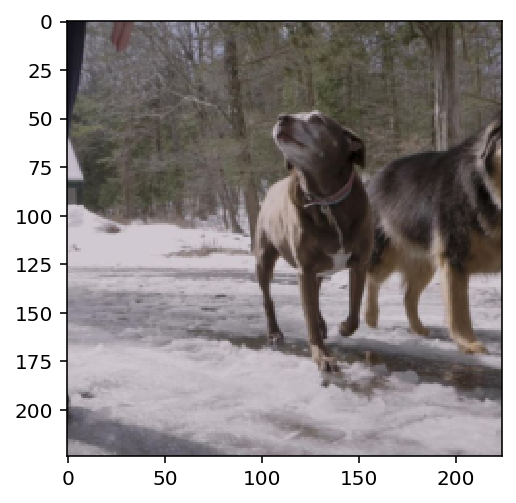

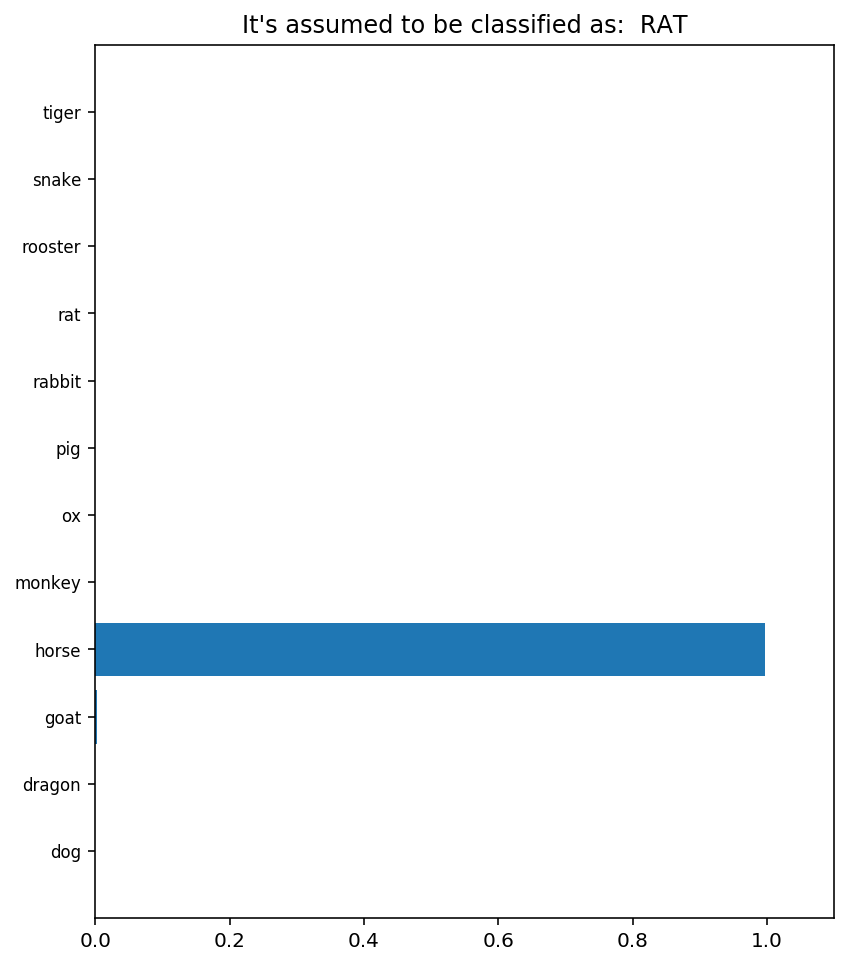

In [53]:
def view_classify(img, ps,  label):
    ''' Function for viewing an image and it's predicted classes.
    '''
    img = img.to('cpu')
    ps = ps.to('cpu')
    label = label.to('cpu')
    ps = ps.data.numpy().squeeze()

    fig, (ax2) = plt.subplots(figsize=(6,9), ncols=1)
    
    ax2.barh(np.arange(12), ps)
    ax2.set_aspect(0.1) 
    ax2.set_yticks(np.arange(12)) 
    ax2.set_yticklabels(['dog', 'dragon', 'goat', 'horse', 'monkey', 'ox', 'pig', 'rabbit', 'rat', 'rooster', 'snake', 'tiger'], size='small');                      
    ax2.set_title("It's assumed to be classified as: " + Class[label.item()].upper())
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()


##
dataiter = iter(testloader)
images, labels = dataiter.next()
images, labels = images.to('cuda'), labels.to('cuda')
images_length = len(images)
idx = np.random.randint(low=0, high=images_length)
img = images[idx]
label = labels[idx]
ps = f.softmax(network(images), dim=1)
imshow(img.to('cpu'))
view_classify(img, ps[idx],  label)